## Data Analysis pipeline for all datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\neues_deutschland.xlsx")
df

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible
0,neues_deutschland,https://www.nd-aktuell.de/artikel/1186113.klau...,"integration, usa, afrika, ukraine, krieg, schi...",2024-10-18,2024-10-18,2024-10-21,Lukas Betzler,NaN,"Hamburg, Heiko Maas, Holocaust, Juden, Nationa...",Papa war kein Nazi,Klaus-Michael Kuehne ist der reichste Deutsche...,Das Unternehmen Kuehne + Nagel profitierte im ...,NaN,NaN,NaN,NaN
1,neues_deutschland,https://www.nd-aktuell.de/artikel/1186087.gewa...,"ns, schi, rna, ss, abschiebung, us, sp, amnest...",2024-10-17,2024-10-17,2024-10-21,Bernhard Clasen,NaN,Femizide,Fehde: Von der Familie verfolgt,Chawa ist Ziel einer Familienfehde. Die deutsc...,Einer tschetschenischen Gefluechteten droht ei...,0.0,1.0,0.0,1.0
2,neues_deutschland,https://www.nd-aktuell.de/artikel/1181044.russ...,"islamisch, syrien, usa, krieg, schi, ns, rna, ...",2024-03-26,2024-03-26,2024-10-21,Ruslan Suleymanov,NaN,"Afghanistan, Al Qaida, IS, Islamismus, Russlan...",Anschlag in Moskau: Terror aus Tadschikistan,Eine Splittergruppe der Terrororganisation Isl...,Der IS-Ableger Khorasan soll fuer das Attentat...,NaN,NaN,NaN,NaN
3,neues_deutschland,https://www.nd-aktuell.de/artikel/1174805.eu-p...,"umweltschutz, csu, cdu, usa, rechtsstaatlichke...",2023-07-17,2023-07-17,2024-10-21,Ariel Tarnev,NaN,"CDU, Europaeische Union, Oesterreich, Polen, R...",Flirt mit den Rechtsradikalen,Bei der Europawahl 2024 muss man davon ausgehe...,Ein Testlauf fuer die Zusammenarbeit von Konse...,0.0,0.0,1.0,1.0
4,neues_deutschland,https://www.nd-aktuell.de/artikel/1185799.anti...,"csu, fdp, cdu, usa, krieg, schi, ns, rna, demo...",2024-10-07,2024-10-07,2024-10-21,Helmut Dahmer,NaN,"AfD, Faschismus, Nationalsozialismus, Rechtsra...",Die Demokratie erweitern,Nach 1945 gab es ploetzlich keine Nazis mehr. ...,Die faschistische Gefahr (Teil 4 und Schluss):...,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,neues_deutschland,https://www.nd-aktuell.de/artikel/1185337.anti...,"gleichberechtigung, ukraine, krieg, schi, ns, ...",2024-09-17,2024-09-17,2024-10-21,Lola Zeller,NaN,"Antidiskriminierung, Antiziganismus, Berlin, R...",Roma in Berlin: Ein Jahrzehnt Stigmatisierung,Im Kontakt mit Leistungsbehoerden wie dem Jobc...,Die Dokumentationsstelle Antiziganismus erfass...,NaN,NaN,NaN,NaN
998,neues_deutschland,https://www.nd-aktuell.de/artikel/1176372.jahr...,"regierung, cdu, amerika, ns, schi, ss, us, sp,...",2023-09-18,2023-09-18,2024-10-21,Pauline Jaeckels,NaN,"Antidiskriminierung, Antiziganismus, Bildungsp...",Antiziganismus in Deutschland: Die Vergangenhe...,Das Papier der Meldestelle fuer Antiziganismus...,Der erste Jahresbericht Antiziganismus hat 621...,NaN,NaN,NaN,NaN
999,neues_deutschland,https://www.nd-aktuell.de/artikel/1170457.rech...,"politik, afrika, usa, frankreich, krieg, schi,...",2023-01-26,2023-01-26,2024-10-21,"Ralf Klingsieck, Paris",NaN,"Einwanderung, Frankreich, Front National, Rech...",Zweitgroesste Gefahr fuer Frankreich,Noch bis Anfang Februar wird vor dem Pariser S...,Ultrarechte Terroristen in Paris vor Strafgeri...,NaN,NaN,NaN,NaN
1000,neues_deutschland,https://www.nd-aktuell.de/artikel/1176300.fluc...,"regierung, usa, ns, schi, ss, demo, us, sp, eu...",2023-09-14,2023-09-14,2024-10-21,Jana Frielinghaus,NaN,"CDU, Europaeische Union, Italien, Ursula von d...",Lampedusa: Verantwortlich ist die EU,Die Hauptverantwortliche fuer die menschenunwu...,Jana Frielinghaus zur Lage von Gefluechteten u...,NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [3]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News        0.0
Extreme bias     8.0
clickbait        8.0
credible        32.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   news_outlet          1002 non-null   object        
 1   provenance           1002 non-null   object        
 2   query_keywords       1002 non-null   object        
 3   creation_date        1002 non-null   datetime64[ns]
 4   last_modified        1002 non-null   datetime64[ns]
 5   crawl_date           1002 non-null   datetime64[ns]
 6   author_person        1002 non-null   object        
 7   author_organization  0 non-null      float64       
 8   news_keywords        992 non-null    object        
 9   content_title        1001 non-null   object        
 10  content_description  1001 non-null   object        
 11  content_body         999 non-null    object        
 12  Fake News            39 non-null     float64       
 13  Extreme bias         39 non-null 

plot of label distr

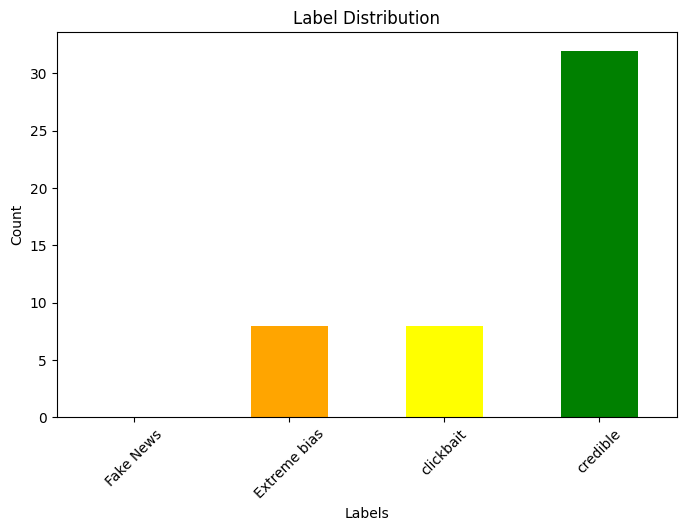

In [5]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

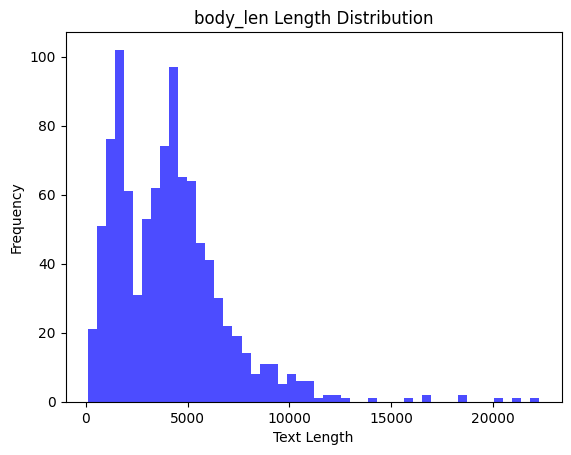

In [6]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

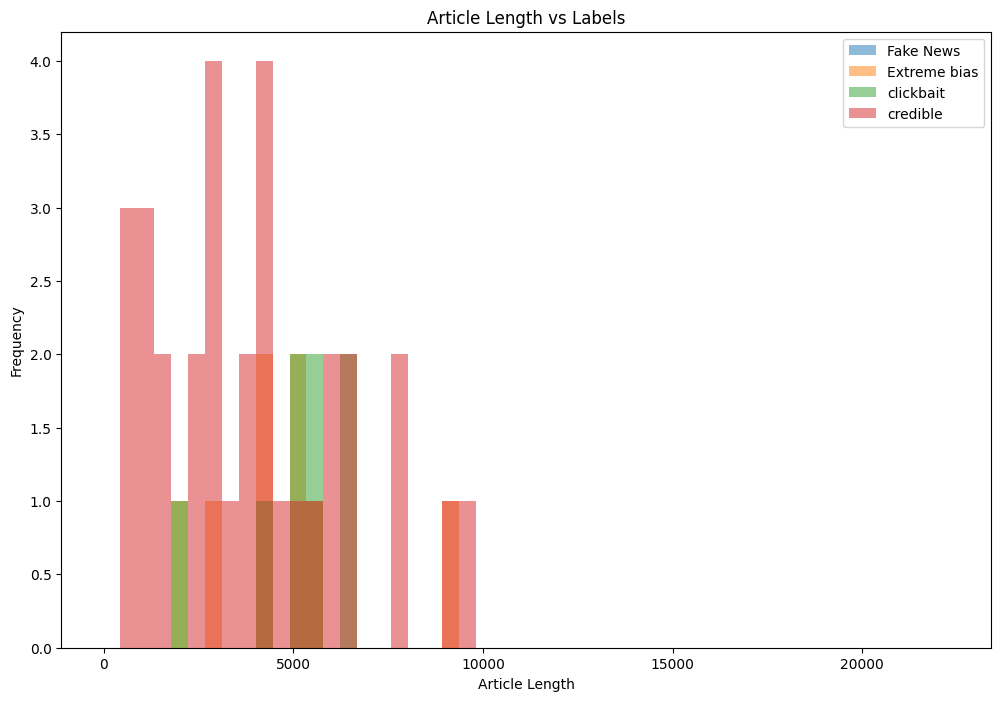

In [7]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize bodies

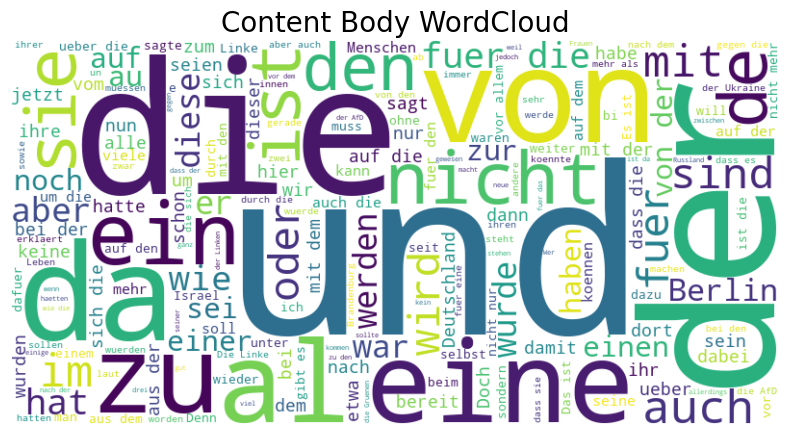

In [8]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Body WordCloud')

visualize titles

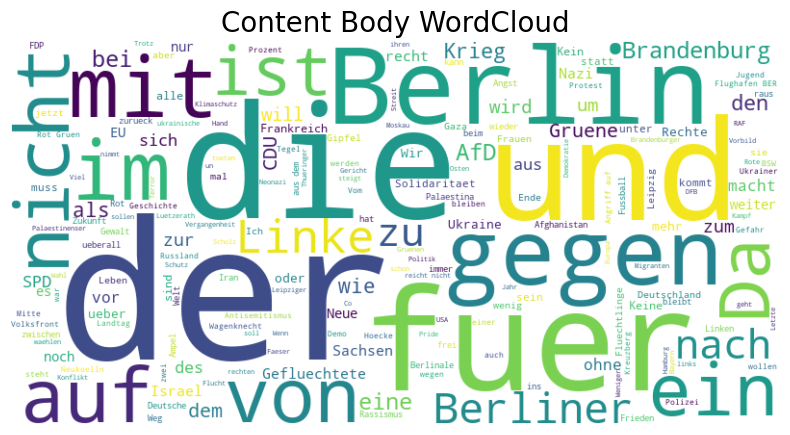

In [ ]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Title WordCloud')

split df to labelled and not labelled

In [10]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 39 rows
Unlabelled Data: 963 rows


In [11]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
1,neues_deutschland,https://www.nd-aktuell.de/artikel/1186087.gewa...,"ns, schi, rna, ss, abschiebung, us, sp, amnest...",2024-10-17,2024-10-17,2024-10-21,Bernhard Clasen,NaN,Femizide,Fehde: Von der Familie verfolgt,Chawa ist Ziel einer Familienfehde. Die deutsc...,Einer tschetschenischen Gefluechteten droht ei...,0.0,1.0,0.0,1.0,2947.0,True
3,neues_deutschland,https://www.nd-aktuell.de/artikel/1174805.eu-p...,"umweltschutz, csu, cdu, usa, rechtsstaatlichke...",2023-07-17,2023-07-17,2024-10-21,Ariel Tarnev,NaN,"CDU, Europaeische Union, Oesterreich, Polen, R...",Flirt mit den Rechtsradikalen,Bei der Europawahl 2024 muss man davon ausgehe...,Ein Testlauf fuer die Zusammenarbeit von Konse...,0.0,0.0,1.0,1.0,6492.0,True
4,neues_deutschland,https://www.nd-aktuell.de/artikel/1185799.anti...,"csu, fdp, cdu, usa, krieg, schi, ns, rna, demo...",2024-10-07,2024-10-07,2024-10-21,Helmut Dahmer,NaN,"AfD, Faschismus, Nationalsozialismus, Rechtsra...",Die Demokratie erweitern,Nach 1945 gab es ploetzlich keine Nazis mehr. ...,Die faschistische Gefahr (Teil 4 und Schluss):...,0.0,0.0,0.0,1.0,668.0,True
6,neues_deutschland,https://www.nd-aktuell.de/artikel/1183257.oppo...,"umweltschutz, islamisch, regierung, usa, ns, s...",2024-06-25,2024-06-25,2024-10-21,Interview: Daniela Sepehri,NaN,"Bildungspolitik, Iran, Kurden, NordSued",Iran: Der Protest jetzt ist wie ein Feuer unte...,Die Kurdin Hore Ghadimi kuemmerte sich um die ...,Die iranische Kurdin Hero Ghadimi blickt vor d...,0.0,0.0,0.0,1.0,9639.0,True
8,neues_deutschland,https://www.nd-aktuell.de/artikel/1180033.tag-...,"politik, regierung, usa, ns, rna, demo, ss, us...",2024-02-15,2024-02-15,2024-10-21,Matthias Monroy,NaN,"Antifa, Dresden, Europaeische Union, Italien, ...",Italien liefert Antifaschisten nicht nach Unga...,"Unterstuetzer fordern, dass auch die in Ungarn...",Staatsanwaltschaft und Gericht befuerchten unm...,0.0,0.0,0.0,1.0,2940.0,True


encode labels

In [12]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_29848\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [13]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
1,neues_deutschland,https://www.nd-aktuell.de/artikel/1186087.gewa...,"ns, schi, rna, ss, abschiebung, us, sp, amnest...",2024-10-17,2024-10-17,2024-10-21,Bernhard Clasen,NaN,Femizide,Fehde: Von der Familie verfolgt,Chawa ist Ziel einer Familienfehde. Die deutsc...,Einer tschetschenischen Gefluechteten droht ei...,0.0,1.0,0.0,1.0,2947.0,True,"[0, 1, 0, 1]"
3,neues_deutschland,https://www.nd-aktuell.de/artikel/1174805.eu-p...,"umweltschutz, csu, cdu, usa, rechtsstaatlichke...",2023-07-17,2023-07-17,2024-10-21,Ariel Tarnev,NaN,"CDU, Europaeische Union, Oesterreich, Polen, R...",Flirt mit den Rechtsradikalen,Bei der Europawahl 2024 muss man davon ausgehe...,Ein Testlauf fuer die Zusammenarbeit von Konse...,0.0,0.0,1.0,1.0,6492.0,True,"[0, 0, 1, 1]"
4,neues_deutschland,https://www.nd-aktuell.de/artikel/1185799.anti...,"csu, fdp, cdu, usa, krieg, schi, ns, rna, demo...",2024-10-07,2024-10-07,2024-10-21,Helmut Dahmer,NaN,"AfD, Faschismus, Nationalsozialismus, Rechtsra...",Die Demokratie erweitern,Nach 1945 gab es ploetzlich keine Nazis mehr. ...,Die faschistische Gefahr (Teil 4 und Schluss):...,0.0,0.0,0.0,1.0,668.0,True,"[0, 0, 0, 1]"
6,neues_deutschland,https://www.nd-aktuell.de/artikel/1183257.oppo...,"umweltschutz, islamisch, regierung, usa, ns, s...",2024-06-25,2024-06-25,2024-10-21,Interview: Daniela Sepehri,NaN,"Bildungspolitik, Iran, Kurden, NordSued",Iran: Der Protest jetzt ist wie ein Feuer unte...,Die Kurdin Hore Ghadimi kuemmerte sich um die ...,Die iranische Kurdin Hero Ghadimi blickt vor d...,0.0,0.0,0.0,1.0,9639.0,True,"[0, 0, 0, 1]"
8,neues_deutschland,https://www.nd-aktuell.de/artikel/1180033.tag-...,"politik, regierung, usa, ns, rna, demo, ss, us...",2024-02-15,2024-02-15,2024-10-21,Matthias Monroy,NaN,"Antifa, Dresden, Europaeische Union, Italien, ...",Italien liefert Antifaschisten nicht nach Unga...,"Unterstuetzer fordern, dass auch die in Ungarn...",Staatsanwaltschaft und Gericht befuerchten unm...,0.0,0.0,0.0,1.0,2940.0,True,"[0, 0, 0, 1]"


we can drop, whatever we dont need, later

export data

In [14]:
labelled_df.to_csv('nd_labelled_data.csv', index=False)
unlabelled_df.to_csv('nd_unlabelled_data.csv', index=False)